In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('train.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [14]:
df.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.416400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102236.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.703641e+03,8.459952,0.254619,1.019010,0.228762,0.757933,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.622288e+04,5.134329,4.032506,1.131065,4.017864,1.115273,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [15]:
#Separo los incomes nulos para estimarlos por medio de un modelo knn
income_null = df[df['MonthlyIncome'].isnull()]

In [16]:
#Genero un dataframe quitando el valor de salarios nulos para poder entrenar el knn
df_sin_incomes_null = df.dropna(subset=['MonthlyIncome'])
df_sin_incomes_null

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0
5,6660,0.041418,80,0,0.003936,10416.0,4,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,33,0,0.182561,9300.0,10,0,0,0,1.0,0
104996,84928,0.805186,68,0,0.229466,5429.0,7,0,0,0,0.0,0
104997,56301,0.811494,51,2,3.709314,3016.0,26,0,4,0,0.0,1
104998,41912,0.412590,62,1,0.173290,14166.0,7,1,1,0,0.0,0


In [17]:
# X = df_sin_incomes_null.drop(['MonthlyIncome','ID'],axis=1)
# y = df_sin_incomes_null['MonthlyIncome']

# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size = 0.20,
#                                                     random_state=42)
# scaler = StandardScaler()

# X_train_scal = scaler.fit_transform(X_train)
# X_test_scal = scaler.transform(X_test)

# k_range = [200,300,400,500,1000,750]
# scores = []

# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_scal, y_train)
#     scores.append(knn.score(X_test_scal, y_test))

In [18]:
corr = df_sin_incomes_null.corr()

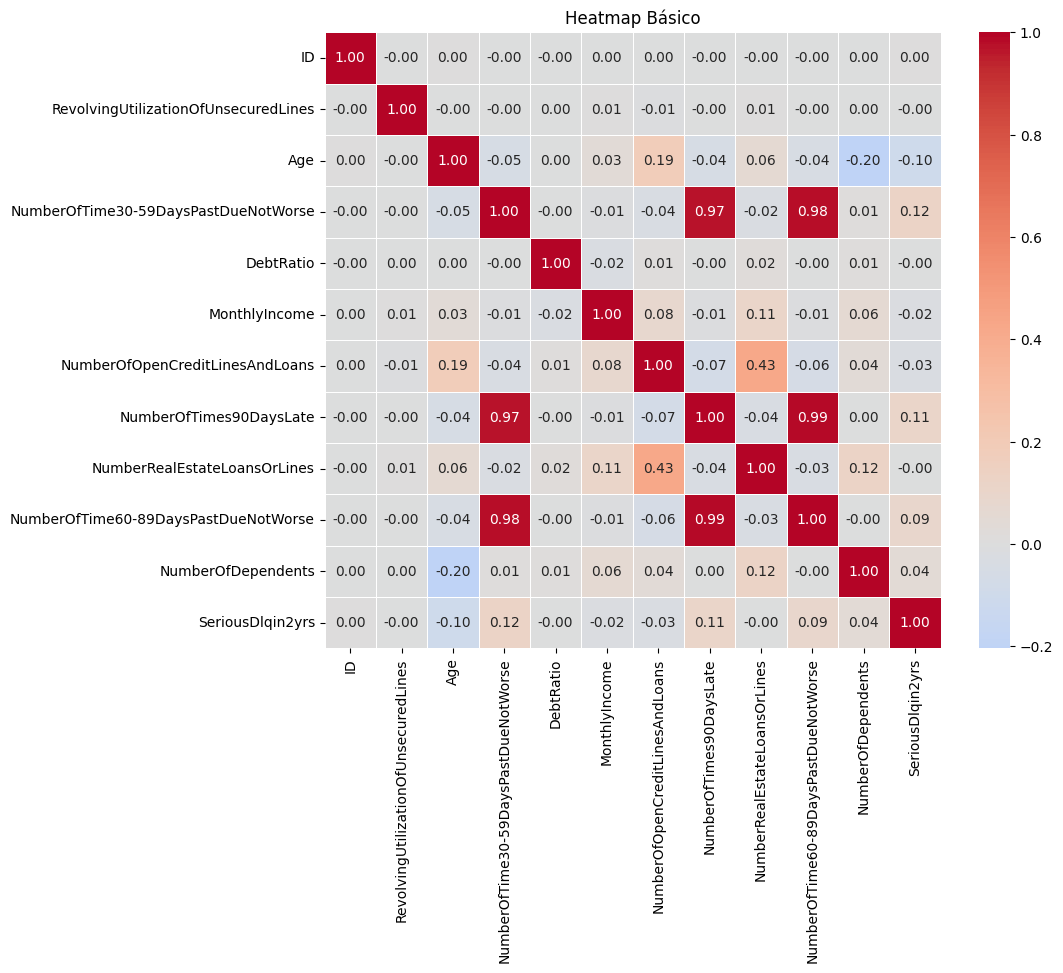

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True,        # Muestra valores
            cmap='coolwarm',   # Paleta de colores
            center=0,          # Centro en 0
            fmt='.2f',         # Formato 2 decimales
            linewidths=0.5,    # Ancho de línea
            square=True)       # Celdas cuadradas

plt.title('Heatmap Básico')
plt.show()

In [20]:
plt.scatter(k_range, scores)


NameError: name 'k_range' is not defined

In [ ]:
df_sin_incomes_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84164 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    84164 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  84164 non-null  float64
 2   Age                                   84164 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  84164 non-null  int64  
 4   DebtRatio                             84164 non-null  float64
 5   MonthlyIncome                         84164 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       84164 non-null  int64  
 7   NumberOfTimes90DaysLate               84164 non-null  int64  
 8   NumberRealEstateLoansOrLines          84164 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  84164 non-null  int64  
 10  NumberOfDependents                    84164 non-null  float64
 11  SeriousDlqin2yrs   

In [ ]:
df.drop(['MonthlyIncome'],axis=1)

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,4,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,33,0,0.182561,10,0,0,0,1.0,0
104996,84928,0.805186,68,0,0.229466,7,0,0,0,0.0,0
104997,56301,0.811494,51,2,3.709314,26,0,4,0,0.0,1
104998,41912,0.412590,62,1,0.173290,7,1,1,0,0.0,0


In [ ]:
test = pd.read_csv('test.csv')

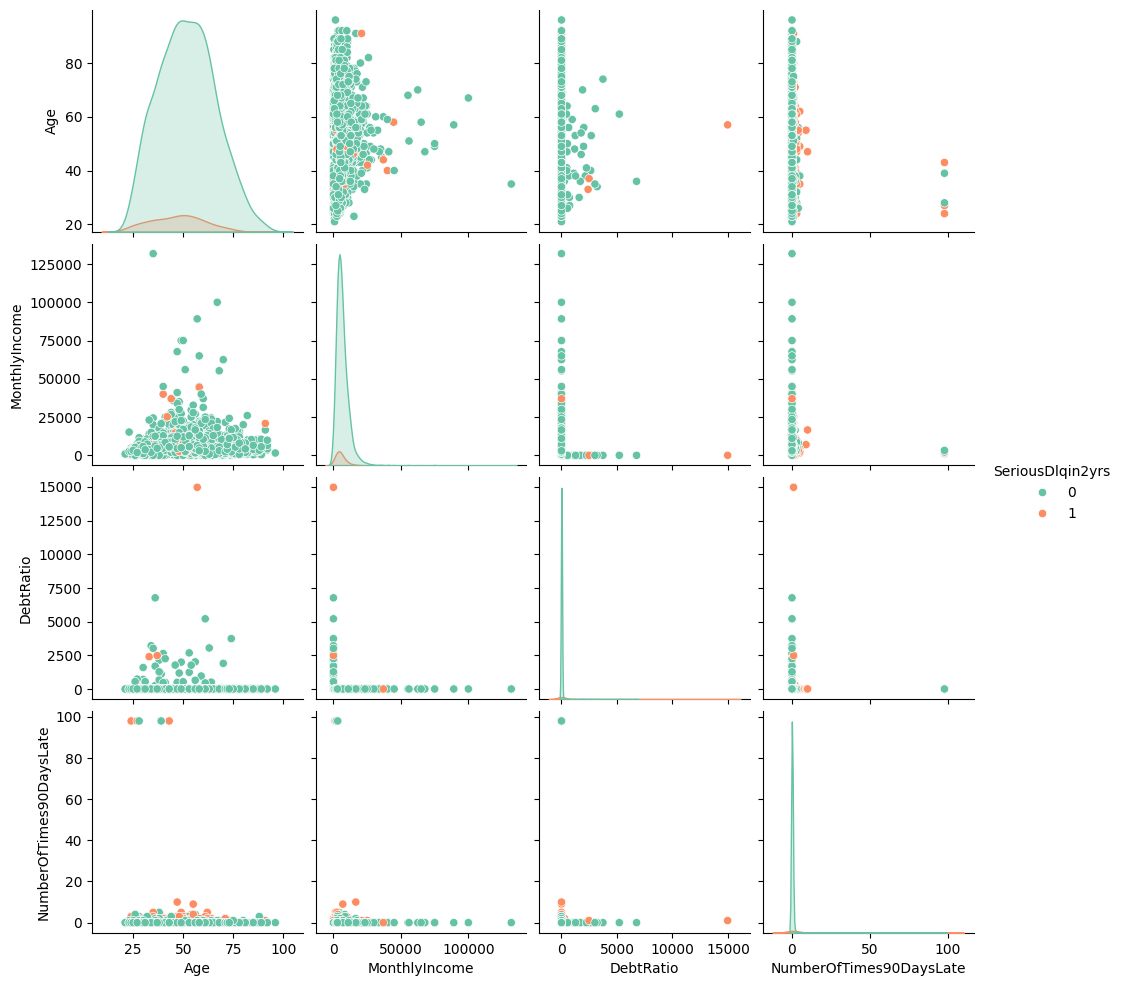

In [ ]:
# Pairplot básico con 4 variables clave
sns.pairplot(
    df_sin_incomes_null[['Age', 'MonthlyIncome', 'DebtRatio', 'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']].sample(3000),
    hue='SeriousDlqin2yrs',
    palette='Set2',
    height=2.5
)
plt.show()

In [ ]:
df_sin_incomes_null['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    78357
1     5807
Name: count, dtype: int64

In [ ]:
#Reemplazo los missing de monthlyincome con la mediana de la columna 
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

In [ ]:
#Tenemos dos dataset, df (habiendo "corregido" nulos) y df_sin_incomes_null (habiando quitado todos los nulos.
# Siendo una forma también de balancear un poco la muestras )

np.int64(105000)

In [26]:
df_sin_incomes_null['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    78357
1     5807
Name: count, dtype: int64